# Extracting the non-topic reviews for the topic-modelling which have the negative comments after the sentiment classification done

In [1]:
import pandas as pd
docs=pd.read_csv('topicselection.csv',index_col=False)
print("number of the reviews classified as +ve and -ve by sentiment classification-----",len(docs.Reviews))
doc=docs.groupby(docs.sentiment)
negetivegrouped=doc.get_group('negative')
negativereviews=negetivegrouped.Reviews
print("number of negative reviews used for the topic model selection --------",len(negativereviews))
negetivegroupedDataset=pd.DataFrame(negetivegrouped)
negetivegroupedDataset

number of the reviews classified as +ve and -ve by sentiment classification----- 880
number of negative reviews used for the topic model selection -------- 807


sentiment                                            Reviews
0    negative  Wouldn't let me log in. I though I just forgot...
1    negative  My first flight was through Delta and the retu...
2    negative  Didn't have a problem with this app until 2020...
4    negative  It is proving impossible to get any customer s...
6    negative  Terrible app. Won't let you log in. Something ...
..        ...                                                ...
875  negative  i only use this maybe once or twice a year, bu...
876  negative  Used to work fine. Now it doesn't fit screen d...
877  negative  Crashes on startup. Stop app, clear memory, tr...
878  negative  Constantly dropping my reservations. Really an...
879  negative  useful for information, its gives you options ...

[807 rows x 2 columns]

# Importing the text cleaning(text preprocessing) libraries

In [2]:
#preprocessign reviews
import unicodedata
import re
import string
import nltk
# nltk.download()
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem import WordNetLemmatizer 
# from spellchecker import SpellChecker
from nltk.corpus import wordnet
import spacy
nlp = spacy.load('en_core_web_sm')
stopwords = spacy.lang.en.stop_words.STOP_WORDS
# from pycontractions import Contractions
from autocorrect import Speller

In [3]:
#function defined to remove unicode data
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
check = Speller(lang='en')
def preprocess_text(sen):
    #sen=Contractions.expand_texts(sen)
    #check the miss spelled word and correct it
    sen=check(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    
    # Single character removal
    #sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence=re.sub(r"\b[a-zA-Z]\b", "", sentence)
    
    #\s	 Matches with a single white space character (space, newline, return, tab, form) and \S (upper case S) matches any non-white space character.
    sentence = re.sub(r'\s+', ' ', sentence)
    
    #\w	 Matches with a alphanumeric character whereas \W (upper case W) matches non alphanumeric character.
    sentence=re.sub(r'\W+', ' ', sentence)
    
    #remove urls from the sentense
    sentence=re.sub(r"http\S+", "", sentence)
    sentence = remove_accented_chars(sentence)
    
    #remove the numbers in the text
    pattern='[0-9]'
    sentence=re.sub(pattern, '', sentence)
    
    return sentence

In [4]:
negetivegrouped.Reviews.apply(preprocess_text)
negetivegrouped.head(5)

sentiment                                            Reviews
0  negative  Wouldn't let me log in. I though I just forgot...
1  negative  My first flight was through Delta and the retu...
2  negative  Didn't have a problem with this app until 2020...
4  negative  It is proving impossible to get any customer s...
6  negative  Terrible app. Won't let you log in. Something ...

In [5]:
# nltk.download('punkt')
# nltk.download('wordnet')

In [6]:
# spell = SpellChecker()
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def stemming(col):
    #doc = nlp(col)
    #lemmas = [token.lemma_ for token in doc]
    ##lower the lokens
    #lemmas=[w.lower() for w in lemmas]
    ## Remove tokens that are not alphabetic and not in stop words
    #a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords] 

    #toknize the sentense
    tokens= word_tokenize(col)
    #tokens = list(cont.expand_texts([tokens], precise=True))
        
    #lower the lokens
    tokens=[w.lower() for w in tokens]
        
    #remove the stop words in the tokens 
    tokens=[word for word in tokens if word not in STOP_WORDS]
        
    #Filter Out Punctuation
    tokens = [word for word in tokens if word.isalpha()]
        
    #correct the tokens which are miss spelled
    #tokens  = [spell.correction(word) for word in tokens]
          
    #lemmatize the tokens to the root word
    words =[lemmatizer.lemmatize(w,wordnet.VERB) for w in tokens]
    return " ".join(words)

In [7]:
negativeProcessed=negetivegrouped.Reviews.apply(stemming)
negativeProcessed

0      let log forget password try website laptop wor...
1      flight delta return flight delay weather failu...
2      problem app spend grand delta sky amex gold sa...
4      prove impossible customer service website trip...
6          terrible app wo let log goofy auth procedures
                             ...                        
875    use maybe twice year open background obvious w...
876    work fine fit screen dimension like look regul...
877    crash startup stop app clear memory try log ag...
878    constantly drop reservations annoy rely have b...
879    useful information give options adjustments ch...
Name: Reviews, Length: 807, dtype: object

115.0


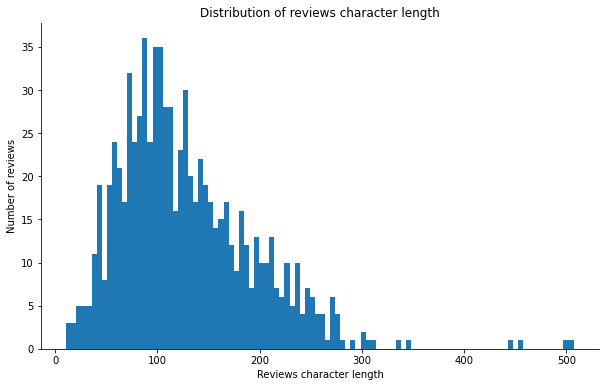

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in negativeProcessed]
print(np.median(doc_lens))
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of reviews character length')
plt.ylabel('Number of reviews')
plt.xlabel('Reviews character length')
sns.despine()
# sns.distplot(doc_lens)

# visulaizing the most used keyword in the reviews using the wordcoud

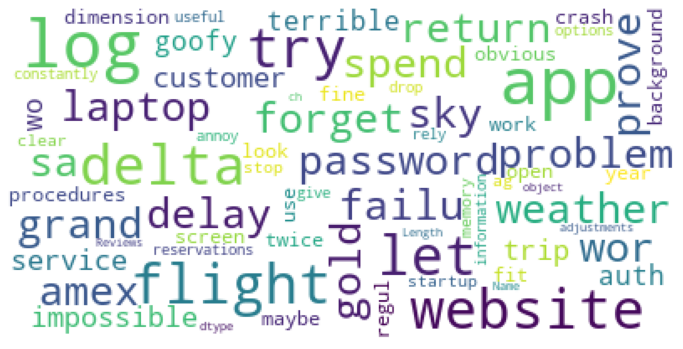

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(negativeProcessed))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

# plotting  the most appering combinations of the text using the ngrams so that we could get idea of what's the customers point 

In [10]:
import plotly.graph_objects as go
from  sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words_uni(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words_uni(negativeProcessed, 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the reviews text after removing stop words and lemmatization"))
fig.show()

In [11]:
def get_top_n_words_bi(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words_bi(negativeProcessed, 30)
df2 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
fig = go.Figure([go.Bar(x=df2['bigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the reviews text after removing stop words and lemmatization"))
fig.show()

In [12]:
def get_top_n_words_tri(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words_tri(negativeProcessed, 30)
print(common_words)
df2 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
fig = go.Figure([go.Bar(x=df2['trigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the reviews text after removing stop words and lemmatization"))
fig.show()

[('print board pass', 28), ('board pass disappear', 23), ('lose board pass', 15), ('app board pass', 14), ('enter confirmation number', 13), ('time open app', 12), ('save board pass', 11), ('confirmation number time', 11), ('board pass app', 11), ('access board pass', 8), ('pull board pass', 8), ('app work great', 7), ('scan board pass', 7), ('paper board pass', 7), ('check board pass', 7), ('app technical difficulties', 7), ('app work fine', 7), ('need board pass', 6), ('load board pass', 6), ('search confirmation number', 6), ('board pass tsa', 6), ('screenshot board pass', 6), ('board pass airport', 6), ('flight board pass', 6), ('board pass flight', 6), ('board pass available', 6), ('fly delta app', 6), ('flight confirmation number', 5), ('board pass trip', 5), ('trip disappear app', 5)]


# Approach of the count vectoriser to convert the text to numerical on count base (1 ,2 ,3) number of times the combinations of words appears in the texts referencing the dictionary created by unique words using  texts

In [13]:
from  sklearn.feature_extraction.text import CountVectorizer
countVect=CountVectorizer(max_df=0.95,min_df=2,ngram_range=(2,2))
negCount=countVect.fit_transform(negativeProcessed)
negCount

<807x1503 sparse matrix of type '<class 'numpy.int64'>'
	with 5576 stored elements in Compressed Sparse Row format>

In [14]:
print("number of the features listed",len(countVect.get_feature_names()))

number of the features listed 1503


In [15]:
import random
for i in range(10):
    random_id = random.randint(0,len(countVect.get_feature_names()))
    print(countVect.get_feature_names()[random_id])

pretty good
book website
app certainly
mobile board
app save
charge app
try search
upgrade seat
baggage carousel
lose trip


# Idea behind the choosing lda. Each document(Review) can be described by a distribution of topics(modules) and each topic can be described by a distribution of words(most used keywords)

In [16]:
!(exp.jpeg)

In [17]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5,random_state=42)
LDA.fit(negCount)

LatentDirichletAllocation(n_components=5, random_state=42)

In [18]:
print("number of the topics created form the model-----",len(LDA.components_))

number of the topics created form the model----- 5


In [19]:
#topics with  the words shape
LDA.components_.shape
#taking the first topic 
topic = LDA.components_[0]

In [20]:
# Top 10 words for this topic:
topic.argsort()[-10:]

array([529, 338, 586, 289, 880, 399, 382, 378, 341, 214], dtype=int64)

In [21]:
top_word_indices = topic.argsort()[-10:]

In [22]:
for index in top_word_indices:
    print(index,countVect.get_feature_names()[index])

529 flight detail
338 confirmation number
586 forget trip
289 change password
880 multiple time
399 delta app
382 customer service
378 credit card
341 connect flight
214 app work


In [23]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([countVect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['flight detail', 'confirmation number', 'forget trip', 'change password', 'multiple time', 'delta app', 'customer service', 'credit card', 'connect flight', 'app work']


THE TOP 10 WORDS FOR TOPIC #1
['let check', 'delta app', 'wo let', 'reset password', 'pass disappear', 'fly delta', 'app crash', 'confirmation number', 'print board', 'board pass']


THE TOP 10 WORDS FOR TOPIC #2
['app need', 'work fine', 'crash time', 'flight information', 'use app', 'flight info', 'app work', 'open app', 'confirmation number', 'board pass']


THE TOP 10 WORDS FOR TOPIC #3
['use app', 'app work', 'print board', 'new update', 'update app', 'pass disappear', 'google pay', 'app crash', 'flight information', 'board pass']


THE TOP 10 WORDS FOR TOPIC #4
['open app', 'use app', 'flight app', 'save board', 'find trip', 'great app', 'fly delta', 'app work', 'confirmation number', 'board pass']




In [24]:
negCount.shape
topic_results = LDA.transform(negCount)
topic_results.shape
topic_results[0]
topic_results[0].round(2)
topic_results[0].argmax()
len(topic_results.argmax(axis=1))

807

In [25]:
negetivegroupedDataset['LDA_topic']=topic_results.argmax(axis=1)
negetivegroupedDataset.to_csv("clusteringtopics.csv",index=False)
negetivegroupedDataset

sentiment                                            Reviews  LDA_topic
0    negative  Wouldn't let me log in. I though I just forgot...          4
1    negative  My first flight was through Delta and the retu...          1
2    negative  Didn't have a problem with this app until 2020...          2
4    negative  It is proving impossible to get any customer s...          0
6    negative  Terrible app. Won't let you log in. Something ...          1
..        ...                                                ...        ...
875  negative  i only use this maybe once or twice a year, bu...          2
876  negative  Used to work fine. Now it doesn't fit screen d...          4
877  negative  Crashes on startup. Stop app, clear memory, tr...          1
878  negative  Constantly dropping my reservations. Really an...          4
879  negative  useful for information, its gives you options ...          1

[807 rows x 3 columns]

# using the gensim with lda

In [26]:
text_data=[]
for col in negativeProcessed:
#     print(word_tokenize(col))
    tokens=word_tokenize(col)
    text_data.append(tokens)
# text_data

In [27]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')
len(dictionary)

2077

In [28]:
import gensim
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 6, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.070*"app" + 0.028*"time" + 0.026*"flight" + 0.021*"work" + 0.016*"check" + 0.015*"try" + 0.014*"delta" + 0.012*"log" + 0.011*"board" + 0.009*"password"')
(1, '0.068*"app" + 0.035*"flight" + 0.018*"delta" + 0.012*"board" + 0.012*"update" + 0.011*"ticket" + 0.010*"use" + 0.010*"pass" + 0.010*"work" + 0.009*"change"')
(2, '0.047*"app" + 0.046*"board" + 0.040*"pass" + 0.026*"trip" + 0.022*"flight" + 0.014*"time" + 0.009*"info" + 0.008*"go" + 0.008*"airport" + 0.008*"security"')
(3, '0.056*"app" + 0.033*"board" + 0.028*"pass" + 0.023*"trip" + 0.022*"time" + 0.018*"work" + 0.017*"confirmation" + 0.017*"number" + 0.015*"log" + 0.012*"try"')
(4, '0.046*"board" + 0.036*"pass" + 0.026*"app" + 0.022*"gate" + 0.014*"flight" + 0.013*"get" + 0.009*"go" + 0.009*"paper" + 0.008*"screen" + 0.008*"time"')
(5, '0.036*"app" + 0.032*"flight" + 0.024*"delta" + 0.014*"time" + 0.012*"check" + 0.012*"work" + 0.011*"board" + 0.009*"pass" + 0.009*"fly" + 0.008*"unreliable"')


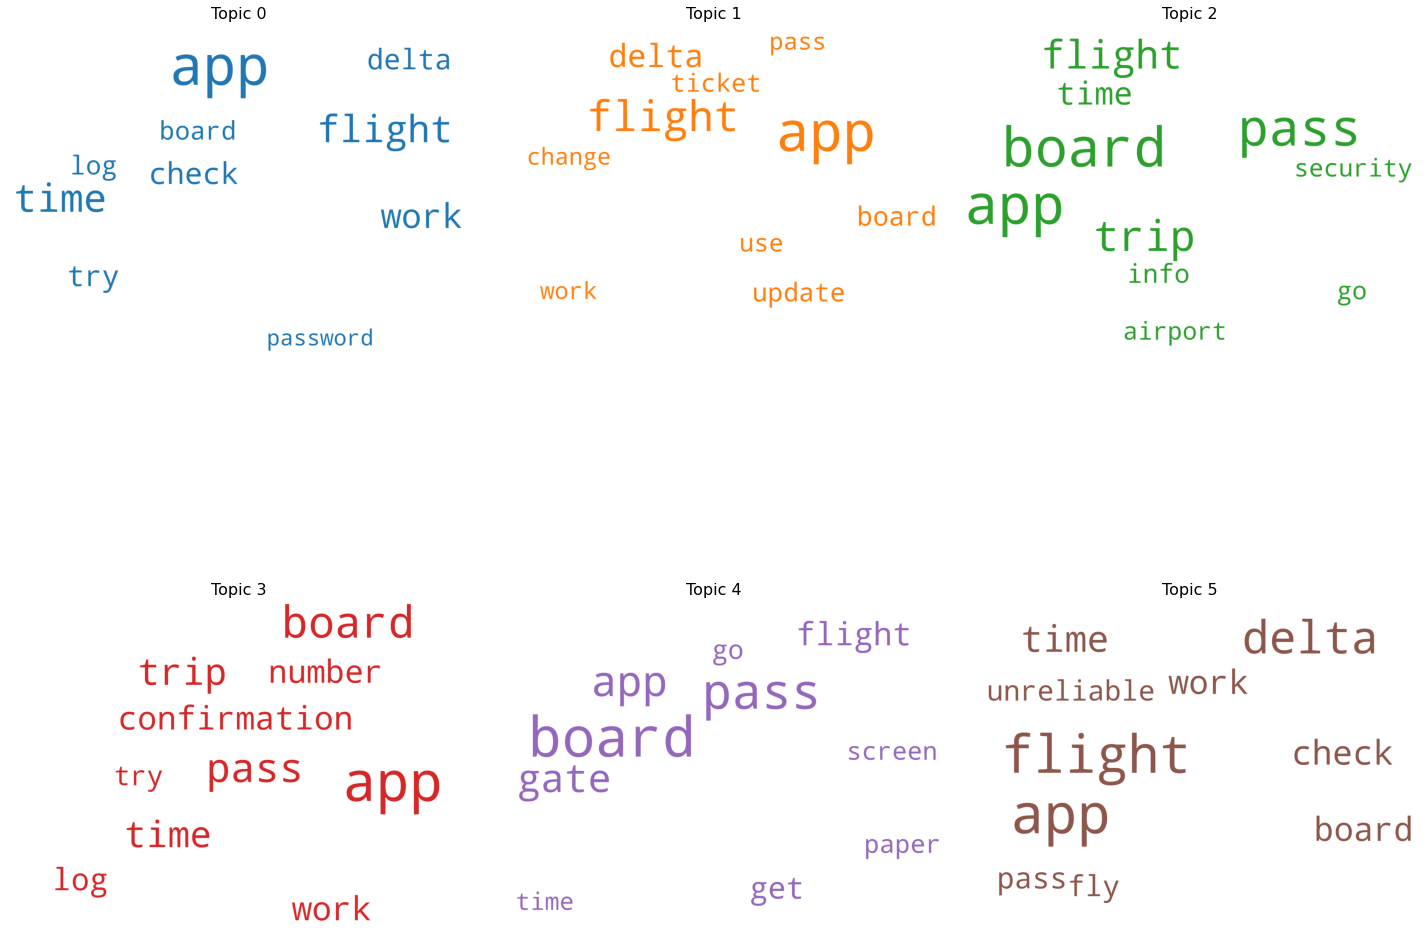

In [29]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
topics = ldamodel.show_topics(formatted=False)
fig, axes = plt.subplots(2,3, figsize=(20,20))

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [30]:
# from gensim.models import CoherenceModel
# coherence_model_lda = CoherenceModel(
#    model=ldamodel, texts=text_data, dictionary=corpus, coherence='c_v'
# )
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)

In [31]:
# # Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=neg, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

# NMF(Non -Negative matrix factorization) 

In [32]:
#TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents.
#In simple terms, words that occur more frequently across the documents get smaller weights.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english',ngram_range=(2,2))
doc_term_matrix = tfidf_vect.fit_transform(negativeProcessed)
doc_term_matrix

<807x1408 sparse matrix of type '<class 'numpy.float64'>'
	with 5330 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(n_components=5, random_state=42)

In [34]:
# import random
# for i in range(10):
#     random_id_2 = random.randint(0,len(countVect.get_feature_names()))
#     print(countVect.get_feature_names()[random_id_2])

In [35]:
first_topic = nmf.components_[0]
top_topic_words = first_topic.argsort()[-10:]
for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

flight board
paper board
forget board
app board
pass app
save board
print board
lose board
pass disappear
board pass


In [36]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['flight board', 'paper board', 'forget board', 'app board', 'pass app', 'save board', 'print board', 'lose board', 'pass disappear', 'board pass']


Top 10 words for topic #1:
['uninstalled reinstall', 'upcoming trip', 'work time', 'technical difficulties', 'customer service', 'work app', 'google pay', 'work great', 'work fine', 'app work']


Top 10 words for topic #2:
['book flight', 'forget trip', 'flight info', 'time open', 'open app', 'search confirmation', 'number time', 'flight information', 'enter confirmation', 'confirmation number']


Top 10 words for topic #3:
['inopportune time', 'app good', 'scan board', 'international trip', 'flight disappoint', 'crash leave', 'new update', 'crash right', 'crash time', 'app crash']


Top 10 words for topic #4:
['app useless', 'app latest', 'flight delta', 'delta flight', 'need update', 'use app', 'app app', 'app need', 'fly delta', 'delta app']




# dictionaryof the trigrams

In [37]:
common_words_tri_grams = get_top_n_words_tri(negativeProcessed)
print('length of the dictionary of tri grams',len(dict(common_words_tri_grams)))
dic=dict(common_words_tri_grams)
listofkeys=list(dic.keys())
listofkeys

length of the dictionary of tri grams 13341


['print board pass',
 'board pass disappear',
 'lose board pass',
 'app board pass',
 'enter confirmation number',
 'time open app',
 'save board pass',
 'confirmation number time',
 'board pass app',
 'access board pass',
 'pull board pass',
 'app work great',
 'scan board pass',
 'paper board pass',
 'check board pass',
 'app technical difficulties',
 'app work fine',
 'need board pass',
 'load board pass',
 'search confirmation number',
 'board pass tsa',
 'screenshot board pass',
 'board pass airport',
 'flight board pass',
 'board pass flight',
 'board pass available',
 'fly delta app',
 'flight confirmation number',
 'board pass trip',
 'trip disappear app',
 'information board pass',
 'board pass delta',
 'board pass gate',
 'display board pass',
 'view board pass',
 'forget board pass',
 'board pass print',
 'use board pass',
 'mobile board pass',
 'board pass phone',
 'look confirmation number',
 'board pass load',
 'confirmation number app',
 'app crash time',
 'board pass go

In [38]:
#loop for key word to map to modules based on existance of the keywords

In [39]:
lis=['this for module1','this for module2','this for module3']
keywords=['module1','module2','module3']
modulenames=['test module','train module','screenmodule']
res = dict(zip(keywords, modulenames)) 
print('dictionary for the keywords as keys and values as module names',res)
moduleSelection={}
for keys in res:
    for string in lis:
        if keys in string:
            moduleSelection[string]=res[keys]
print('selected modules----------',moduleSelection)

dictionary for the keywords as keys and values as module names {'module1': 'test module', 'module2': 'train module', 'module3': 'screenmodule'}
selected modules---------- {'this for module1': 'test module', 'this for module2': 'train module', 'this for module3': 'screenmodule'}


In [40]:
trigrams=listofkeys
BookingKeywords=('book','ticket')
Boardingkeywords=('board','pass')
TrackingKeywords=('track','status','delay','cancel')
LoginKeywords=('login','password')
Cargokeywords=('baggage','cargo','bag')
PaymentKeywords=('pay','confirmation')
UserKeywords=('trip')
SupportKeywords=('support','customers')
modules=['BoardingModule','BookingModule','TrackingModule','LoginModule','CargoModule','PaymentModule','SupportModule']
dct = dict(zip(modules, [None]*len(modules)))
dct

{'BoardingModule': None,
 'BookingModule': None,
 'TrackingModule': None,
 'LoginModule': None,
 'CargoModule': None,
 'PaymentModule': None,
 'SupportModule': None}

In [41]:
BoardingTrigrams=[]
BookingTrigrams=[]
TrackingTrigrams=[]
LoginTrigrams=[]
CargoTrigrams=[]
PaymentTrigrams=[]
UserTrigrams=[]
SupportTrigrams=[]

#taking the list of trigrams and refrencing with the modulekeywords and add the trigram as a value to the module key
for tri in trigrams:
    for board in Boardingkeywords:
        if board in tri.split():
            BoardingTrigrams.append(tri)
    for book in BookingKeywords:
        if book in tri.split():
            BookingTrigrams.append(tri)
    for trace in TrackingKeywords:
        if trace in tri.split():
            TrackingTrigrams.append(tri)
    for login in LoginKeywords:
        if login in tri.split():
            LoginTrigrams.append(tri)
    for cargo in Cargokeywords:
        if cargo in tri.split():
            CargoTrigrams.append(tri)
    for pay in PaymentKeywords:
        if pay in tri.split():
            PaymentTrigrams.append(tri)
    for trip in UserKeywords:
        if trip in tri.split():
            UserTrigrams.append(tri)
    for supp in SupportKeywords:
        if supp in tri.split():
            SupportTrigrams.append(tri)

dct['BoardingModule']=BoardingTrigrams
dct['BookingModule']=BookingTrigrams
dct['TrackingModule']=TrackingTrigrams
dct['LoginModule']=LoginTrigrams
dct['CargoModule']=CargoTrigrams
dct['PaymentModule']=PaymentTrigrams
dct['SupportModule']=SupportTrigrams
dct

{'BoardingModule': ['print board pass',
  'print board pass',
  'board pass disappear',
  'board pass disappear',
  'lose board pass',
  'lose board pass',
  'app board pass',
  'app board pass',
  'save board pass',
  'save board pass',
  'board pass app',
  'board pass app',
  'access board pass',
  'access board pass',
  'pull board pass',
  'pull board pass',
  'scan board pass',
  'scan board pass',
  'paper board pass',
  'paper board pass',
  'check board pass',
  'check board pass',
  'need board pass',
  'need board pass',
  'load board pass',
  'load board pass',
  'board pass tsa',
  'board pass tsa',
  'screenshot board pass',
  'screenshot board pass',
  'board pass airport',
  'board pass airport',
  'flight board pass',
  'flight board pass',
  'board pass flight',
  'board pass flight',
  'board pass available',
  'board pass available',
  'board pass trip',
  'board pass trip',
  'information board pass',
  'information board pass',
  'board pass delta',
  'board pass 

In [42]:
import re
modules={}
noModules={}
for keys,values in dct.items():
    for col in negativeProcessed:
        for val in values:
            if re.search(val,col):
                modules[col]=keys
            

In [43]:
topicsprediction=pd.DataFrame(list(modules.items()),columns = ['text','topics']) 
print(topicsprediction)
topicsprediction.iloc[0:,1]

                                                  text          topics
0    app crash right scan board pass wipe trip try ...     LoginModule
1    general issue people lose trip time travel try...  BoardingModule
2    app years issue recently tsa precheck show mob...  BoardingModule
3    generally dynamic app fail give passengers tp ...  BoardingModule
4    work time better option read password type web...     LoginModule
..                                                 ...             ...
522  log need enter confirmation number time want u...   PaymentModule
523  wow stress bad app find time flight try multip...   PaymentModule
524  delta take advantage customers lie refund try ...   SupportModule
525  worst app sooooo badly design complex viewable...   SupportModule
526  trip useful app market tool sale customers foc...   SupportModule

[527 rows x 2 columns]


0         LoginModule
1      BoardingModule
2      BoardingModule
3      BoardingModule
4         LoginModule
            ...      
522     PaymentModule
523     PaymentModule
524     SupportModule
525     SupportModule
526     SupportModule
Name: topics, Length: 527, dtype: object

In [44]:
topicsprediction.to_csv('topicsprediction.csv')